# Линейная зависимость векторов

In [1]:
import numpy as np

In [5]:
e1 = np.array([1.0, 0.0, 0.0])
e2 = np.array([0.0, -5.0, 0.0])
a = np.array([10., 5.0, 0.0])
10*e1 -1*e2

array([ 10.,   5.,   0.])

In [6]:
10*e1 -1*e2 == a

array([ True,  True,  True], dtype=bool)

In [7]:
10*e1 -1*e2 - 1*a

array([ 0.,  0.,  0.])

In [8]:
M = np.array([e1, e2, a])
M

array([[  1.,   0.,   0.],
       [  0.,  -5.,   0.],
       [ 10.,   5.,   0.]])

In [9]:
np.linalg.matrix_rank(M)

2

In [10]:
b1, b2, b3 = M[:,0], M[:,1], M[:,2]
b1

array([  1.,   0.,  10.])

In [11]:
0*b1 + 0*b2 -1*b3

array([ 0.,  0.,  0.])

1.Рассмотрим 3 вектора:

$
\left[\begin{array}{c}a\\0\\0\end{array}\right] \left[\begin{array}{c} b\\d\\0\end{array}\right] \left[\begin{array}{c}c\\e\\f\end{array}\right]
$

Известно, что три числа из набора чисел $\{a,b,c,d,e,f\}$ равны нулю, а оставшиеся три — отличны от нуля. Выберите варианты, при которых эти векторы линейно зависимы.

1. a=0,b=0,f=0 

2. b=0,e=0,f=0

3. c=0,d=0,f=0

4. b=0,c=0,e=0

5. a=0,b=0,d=0

6. a=0,e=0,f=0

In [12]:
M = np.array([
    #a, b, c, d, e, f
    [0, 0, 1, 1, 1, 0],
    [1, 0, 1, 1, 0, 0],
    [1, 1, 0, 0, 1, 0],
    [1, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 1, 1],
    [0, 1, 1, 1, 0, 0]
])

In [13]:
for a, b, c, d, e, f in M:
    N = np.array([
        [a, 0, 0],
        [b, d, 0],
        [c, e, f]
    ])
    print a, b, c, d, e, f
    print N
    print np.linalg.matrix_rank(N)
    print

0 0 1 1 1 0
[[0 0 0]
 [0 1 0]
 [1 1 0]]
2

1 0 1 1 0 0
[[1 0 0]
 [0 1 0]
 [1 0 0]]
2

1 1 0 0 1 0
[[1 0 0]
 [1 0 0]
 [0 1 0]]
2

1 0 0 1 0 1
[[1 0 0]
 [0 1 0]
 [0 0 1]]
3

0 0 1 0 1 1
[[0 0 0]
 [0 0 0]
 [1 1 1]]
1

0 1 1 1 0 0
[[0 0 0]
 [1 1 0]
 [1 0 0]]
2



2.Найдите среди заданных шести векторов вида

$\left[\begin{array}{c}1\\-1\\0\\0 \end{array}\right],  \left[\begin{array}{c}1\\0\\-1\\0 \end{array}\right], \left[\begin{array}{c}1\\0\\0\\-1 \end{array}\right], \left[\begin{array}{c}0\\1\\-1\\0 \end{array}\right], \left[\begin{array}{c}0\\1\\0\\-1 \end{array}\right], \left[\begin{array}{c}0\\0\\1\\-1 \end{array}\right]$

наибольшее количество линейно независимых векторов.

In [14]:
M = np.array([
    [1, -1, 0, 0],
    [1, 0, -1, 0],
    [1, 0, 0, -1],
    [0, 1, -1, 0],
    [0, 1, 0, -1],
    [0, 0, 1, -1]
])

In [15]:
np.linalg.matrix_rank(M)

3

3.Какие из нижеперечисленных векторов образуют базис в трехмерном пространстве $\mathbb{R}^3$?

1. (1, 2, 0), (0, 1, -1)
2. (1, 1 -1), (2, 3, 4), (4, 1, -1), (0, 1, -1)
3. (1, 2, 2), (-1, 2, 1), (0, 8, 0)
4. (1, 2, 2), (-1, 2, 1), (0, 8, 6)


Hint. Базис образуют линейно независимые вектора, из линейной комбинации которых можно получить любой вектор в пространстве данно размерности.

In [16]:
MM = np.array([
    [(1, 2, 2), 
     (-1, 2, 1), 
     (0, 8, 0)],
    [(1, 2, 2),
     (-1, 2, 1),
     (0, 8, 6)]
])
MM[0]

array([[ 1,  2,  2],
       [-1,  2,  1],
       [ 0,  8,  0]])

In [17]:
for M in MM:
    print np.linalg.matrix_rank(M)

3
2


### Норма и метрика:

- *Интуативный бытовой пример **нормы** - **длина***

- *Интуитивный пример **метрики** - **расстояние***

### Зачем нужна метрика?

Рассмотрим датасет "Red Wine Dataset" https://www.kaggle.com/piyushgoyal443/red-wine-dataset

In [20]:
import pandas as pd
D = pd.read_csv('wineQualityReds.csv')
D.head(15)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,6,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,8,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,9,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,10,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Предположим, мы имеем 2 алгоритма, предсказывающих качество вина по имеющимся данным о его характеристикам:

- Predict1 - всегда ставит 5
- Predict2 - более сложный алогритм, который иногда сильно не угалывает (см. 18 строку)

Тогда предсказания обоих алгоритмов можно внести в таблицу:

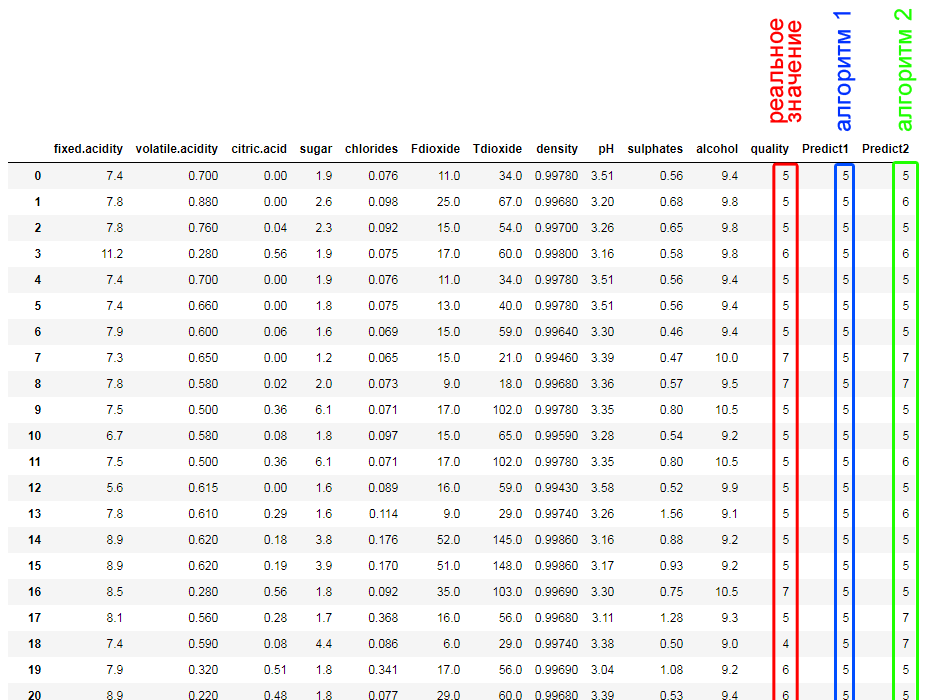

**Какой из алгоритмов лучше Predict1 или Predict2?**

Если представить правильные значения и предсказания обоих алгоритмов в виде векторов:

- $Y_{ист} = [5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, ...]$
- $P_{pr1} = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...]$
- $P_{pr3} = [5, 6, 5, 6, 5, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 5, 5, 7, 7, 5, 5, ...]$

, то в метрика (т.е. расстояние) между вектором предсказания и вектором правильных ответов и будет мерой качества алгоритма. Чем ближе значение прогнозного и истинного значения для каждой точки, тем точнее алгоритм, тем меньше метрика, тем меньше расстояние между векторами.

- Манхэттонская метрика: $\|{\mathbf  {p}}-{\mathbf  {y}}\|=\sum _{{i=1}}^{n}|p_{i}-y_{i}|$

- Евклидова метрика: $\|{\mathbf  {p}}-{\mathbf  {y}}\|_{2}={\sqrt  {\sum _{{i}}^{n}(p_{i}-y_{i})^{2}}}$

In [21]:
Y = np.array([5,5,5,6,5,5,5,7,7,5,5,5,5,5,5,5,7,5,4,6,6])
P1 = np.array([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5])
P2 = np.array([5,6,5,6,5,5,5,7,7,5,5,6,5,6,5,5,5,7,7,5,5])

In [24]:
sum(abs(P1 - Y))

10

In [25]:
sum(abs(P2 - Y))

12

### Косинусное расстояние, Косинусная близость

Косинусная близость или просто косинус угла между 2 векторами:
$$\frac{u \cdot v}
         {||u||_2 ||v||_2}$$
    
Косинусное расстояние:

$$1 - \frac{u \cdot v}
         {||u||_2 ||v||_2}$$

Чем ближе 2 вектора:
- тем больше косинус ($cos(0^{\circ}) = 1$)
- тем меньше косинусное расстояние ($1 - cos(0^{\circ}) = 0$)

In [26]:
np.dot(Y, P1)

565

In [27]:
np.linalg.norm(Y)* np.linalg.norm(P1)

570.98598932022833

In [28]:
np.dot(Y, P1) / (np.linalg.norm(Y)* np.linalg.norm(P1))

0.98951639894464871

In [29]:
np.dot(Y, P2) / (np.linalg.norm(Y)* np.linalg.norm(P2))

0.98346850293849342

In [30]:
from scipy.spatial.distance import cosine

In [31]:
cosine(Y, P1)

0.010483601055351288

In [32]:
cosine(Y, P2)

0.016531497061506584

### СЛАУ

Практикум - https://stepik.org/lesson/31653/step/1

Решите систему уравнений:

$
\left\{\begin{matrix}
5x + 6y = 11\\ 
x + y = 2
\end{matrix}\right.
$

Запишем систему в матричном виде: $ A \cdot x = B$, где 

- A - матрица коэффициентов перед неизвестными (левая часть системы)
    
- B - вектор свободных членов (правая часть системы)  


$A = \begin{pmatrix}
5 & 6 \\ 
1 & 1
\end{pmatrix}$

$B = \begin{pmatrix}
11 \\ 
2 
\end{pmatrix}$

In [33]:
A = np.array([
    [5, 6],
    [1, 1]
])
B = np.array([11, 2])

In [35]:
np.reshape(B, (2, 1))

array([[11],
       [ 2]])

In [36]:
Ab = np.hstack((A, np.reshape(B, (2, 1))))
Ab

array([[ 5,  6, 11],
       [ 1,  1,  2]])

In [37]:
np.linalg.matrix_rank(A), np.linalg.matrix_rank(Ab)

(2, 2)

In [38]:
np.linalg.solve(A, B)

array([ 1.,  1.])

In [39]:
A = np.array([
    [5, 5],
    [1, 1]
])
B = np.array([11, 2])

In [40]:
Ab = np.hstack((A, np.reshape(B, (2, 1))))
Ab

array([[ 5,  5, 11],
       [ 1,  1,  2]])

In [41]:
np.linalg.matrix_rank(A), np.linalg.matrix_rank(Ab)

(1, 2)

In [42]:
np.linalg.det(A)

-2.7755575615628958e-16

In [43]:
np.linalg.solve(A, B)

array([ -3.60287970e+15,   3.60287970e+15])

### Многочлен степени n и матрица Вандермонда

$w_0 + w_1x + w_2x^2 + w_3x^3 + ... + w_nx^n$

Многочлен 5 степени - $w_0 + w_1x + w_2x^2 + w_3x^3 + w_4x^4 + w_5x^5$

In [45]:
x_list = [0, -1, 1, -2, 2, 3]
for x in x_list:
    print [x**i for i in range(6)]

[1, 0, 0, 0, 0, 0]
[1, -1, 1, -1, 1, -1]
[1, 1, 1, 1, 1, 1]
[1, -2, 4, -8, 16, -32]
[1, 2, 4, 8, 16, 32]
[1, 3, 9, 27, 81, 243]


In [46]:
np.vander(x_list)

array([[  0,   0,   0,   0,   0,   1],
       [ -1,   1,  -1,   1,  -1,   1],
       [  1,   1,   1,   1,   1,   1],
       [-32,  16,  -8,   4,  -2,   1],
       [ 32,  16,   8,   4,   2,   1],
       [243,  81,  27,   9,   3,   1]])

In [47]:
np.vander(x_list)[:,::-1]

array([[  1,   0,   0,   0,   0,   0],
       [  1,  -1,   1,  -1,   1,  -1],
       [  1,   1,   1,   1,   1,   1],
       [  1,  -2,   4,  -8,  16, -32],
       [  1,   2,   4,   8,  16,  32],
       [  1,   3,   9,  27,  81, 243]])

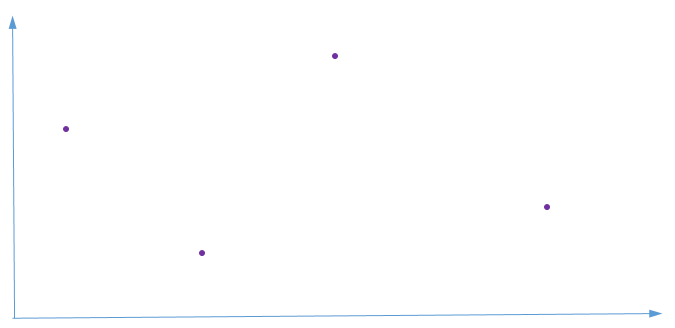

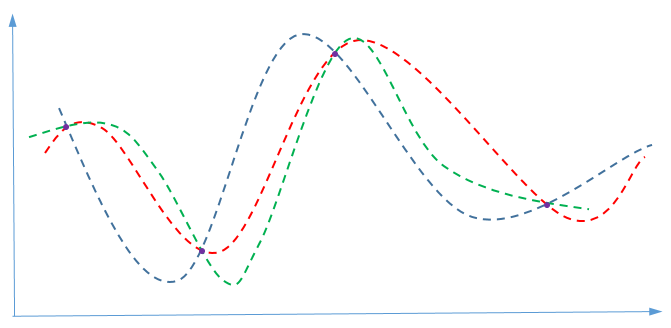